In [1]:
from skimage import io, exposure  
from sklearn.cluster import KMeans, AgglomerativeClustering
from skimage.measure import label
from skimage.transform import resize
from skimage.color import label2rgb, rgb2gray
import numpy as np
import skimage as sk 
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn import mixture

In [120]:
imaori = rgb2gray(sk.io.imread('prueb8.jpg')) #llegir imatge i convertir a grayscale

from skimage.filters import gaussian
imaorif = gaussian(imaori, sigma=5, multichannel=True) 

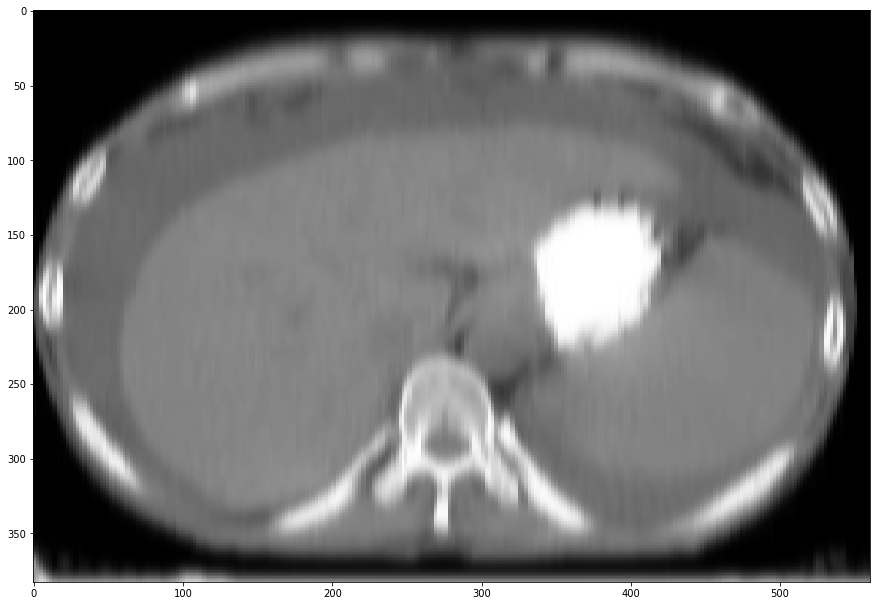

In [121]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 2)

plt.imshow(imaorif, cmap=plt.cm.gray)
plt.show()

In [122]:
v_I_train = np.reshape(imaorif,(imaorif.shape[0]*imaorif.shape[1],1)) #convertir a vector

#v_I_train = v_I_train[v_I_train<0.9]

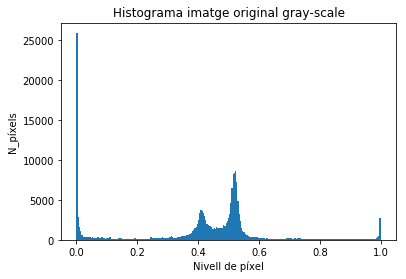

In [123]:
plt.hist(v_I_train,bins=255)
plt.title('Histograma imatge original gray-scale')
plt.ylabel('N_píxels')
plt.xlabel('Nivell de píxel')
plt.show()

In [124]:
#v_I_train = np.expand_dims(v_I_train, axis=1)

In [136]:
#calcula el BIC per trobar el número de gaussianes òptim
NMAX = 10
bic = []
aic = []

for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG).fit(v_I_train)
    bic.append(gmm.bic(v_I_train)) #cada cop va afegint el bic amb kG+1, així ho tens tot en un vector i pots calcualr el mínim
    aic.append(gmm.aic(v_I_train)) #cada cop va afegint el bic amb kG+1, així ho tens tot en un vector i pots calcualr el mínim

print(bic)
print(aic)


idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))

[-12058.267424243266, -209170.01002536327, -184386.88157130303, -327141.5612205711, -370830.1667961087, -377890.24466466263, -387076.69183864206, -399706.97687821847, -403649.52899953834, -405901.5557284481]
[-12078.822936032673, -209221.3988048368, -184469.10361846065, -327254.61653541285, -370974.05537863454, -378064.9665148726, -387282.24695653614, -399943.36526379664, -403916.7506528006, -406199.6106493945]
...and the winner is GMM model G = 10


In [137]:
idx_winner1 = np.argmin(aic)


In [138]:
idx_winner1

9

In [126]:
gmmw = mixture.GaussianMixture(n_components=idx_winner).fit(v_I_train)


In [140]:
gmmw.means_

array([[7.11291061e-04],
       [5.18609787e-01],
       [8.87513930e-01],
       [4.25579692e-01],
       [5.33890042e-02],
       [5.78876867e-01],
       [2.77065651e-01],
       [7.10655641e-01],
       [9.97805816e-01]])

In [141]:
gmmw.weights_

array([0.12570611, 0.31845864, 0.03656911, 0.27782647, 0.07363502,
       0.04253621, 0.07149044, 0.03765997, 0.01611803])

In [150]:
np.sqrt(gmmw.covariances_)

array([[[0.00168846]],

       [[0.01466687]],

       [[0.06508287]],

       [[0.03577574]],

       [[0.04457546]],

       [[0.03403627]],

       [[0.07867034]],

       [[0.05288334]],

       [[0.00331054]]])

Text(0.5, 0, 'N_Gauss')

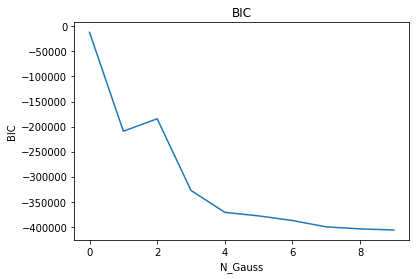

In [139]:
#fem un plot del BIC per veure com evoluciona sengons el número de gaussianes
plt.plot(bic)
plt.title('BIC')
plt.ylabel('BIC')
plt.xlabel('N_Gauss')

Text(0.5, 0, 'N_Gauss')

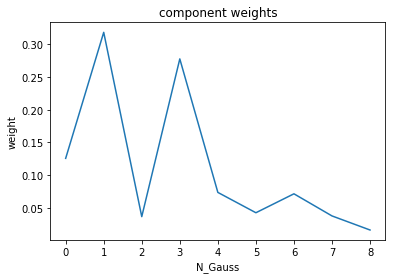

In [148]:
#fem un plot del BIC per veure com evoluciona sengons el número de gaussianes
plt.plot(gmmw.weights_)
plt.title('component weights')
plt.ylabel('weight')
plt.xlabel('N_Gauss')

In [131]:
#Hem de descartar els que tinguin un gradient baix (estaríem augmentant el nombre de gaussianes sense millorar la exactitut)
de = 2 #com a mínim sempre tindrem objecte i fons, dues gaussianes
for u in range(2,len(bic)-1):
    if abs(bic[u+1])>abs(bic[u]*1.1): #HEM DE QUANTIFICAR BÉ AQUEST PARÀMETRE. Com a mínim, el BIC següent ha de ser un 10%
        #millor que el anterior per a que valgui la pena afegir una gaussiana més.
        de = de + 1
    else:
        break
print(de)

4


In [132]:
v_agg = gmmw.fit_predict(v_I_train)
imafin = np.array(v_agg).reshape(imaori.shape[0],imaori.shape[1])# Shape back result as image
#label = label(imafin)
#segmen = label2rgb(imafin, imaori, kind='avg')

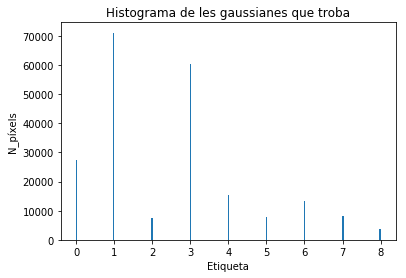

In [133]:
hist1 = np.histogram(v_agg, bins=256)
plt.hist(v_agg,bins=255)
plt.title('Histograma de les gaussianes que troba')
plt.ylabel('N_píxels')
plt.xlabel('Etiqueta')
plt.show()

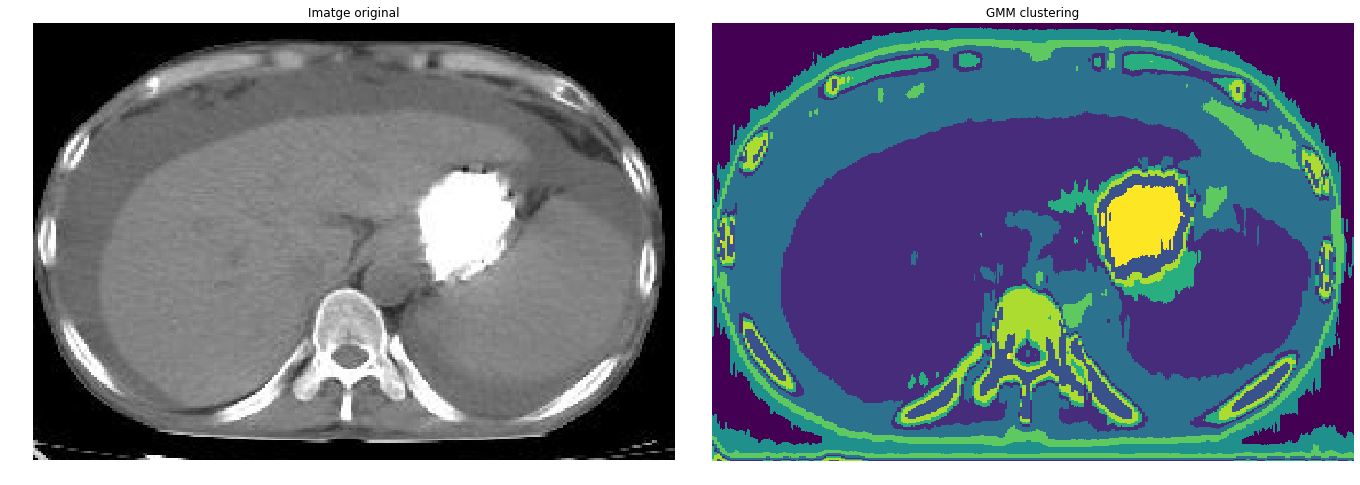

In [149]:

fig = plt.figure(figsize=(19, 19))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(imaori, cmap=plt.cm.gray)
ax0.set_title('Imatge original')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(imafin)
ax1.set_title('GMM clustering')
ax1.set_axis_off()

plt.tight_layout()
plt.show()

### Histograma

In [76]:
v_I_train

array([[85],
       [85],
       [85],
       ...,
       [85],
       [85],
       [85]], dtype=uint8)

In [77]:
hist = np.histogram(v_I_train, bins=256)

In [78]:
np.argmax(hist[0])

85

In [79]:
v_I_train = v_I_train*255

In [80]:
v_I_train = v_I_train[v_I_train != np.argmax(hist[0])]

In [81]:
v_I_train = v_I_train.reshape(-1, 1)
print(v_I_train)

[[171]
 [171]
 [171]
 ...
 [171]
 [171]
 [171]]


In [82]:
hist2 = np.histogram(v_I_train, bins=256)

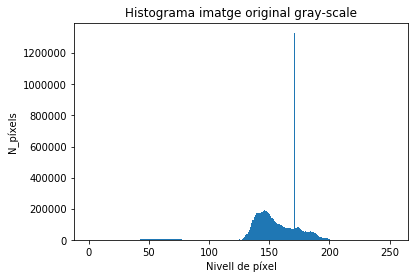

In [83]:
plt.hist(v_I_train,bins=255)
plt.title('Histograma imatge original gray-scale')
plt.ylabel('N_píxels')
plt.xlabel('Nivell de píxel')
plt.show()
